In [10]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
from PIL import Image

## Load Model and datas

In [11]:
model = tf.keras.models.load_model('./my_model', compile=True)

In [12]:
my_liked_song = pd.read_csv("./DF/My_Liked_Songs.csv")

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id="CLIENT_ID",
    client_secret="KEY"))

In [14]:
tracklist_ids = list(my_liked_song['Song_ID'])
tracklist_ids_sublists = [tracklist_ids[x:x+50] for x in range(0, len(tracklist_ids), 50)]

In [16]:
tracks_list=[]
for i in tracklist_ids_sublists:
    tracks_list.append(sp.tracks(i))

In [17]:
# %% LISTS DETAILS FROM TRACKS
track_id = []
track_name = []
track_artist = []
track_popularity = []
track_url = []

for i in range(len(tracks_list)):
    for j in range(len(tracks_list[i]['tracks'])):
        track_id.append(tracks_list[i]['tracks'][j]['id'])
        track_name.append(tracks_list[i]['tracks'][j]['name'])
        track_artist.append(tracks_list[i]['tracks'][j]['artists'][0]['name'])
        track_popularity.append(tracks_list[i]['tracks'][j]['popularity'])
        track_url.append(tracks_list[i]['tracks'][j]['preview_url'])

In [18]:
my_Music = pd.DataFrame({
    'Track_ID' : track_id,
    'Track_Title' : track_name,
    'Track_Artist' : track_artist,
    'Track_Popularity' : track_popularity,
    'Track_URL' : track_url
})

In [19]:
my_Music = my_Music.loc[~my_Music.Track_URL.isna()]

In [20]:
#%% LIST OF TRACKS IDs
tracklist_ids = list(my_Music['Track_ID'])

tracklist_ids_sublists = [tracklist_ids[x:x+100] for x in range(0, len(tracklist_ids), 100)]

#%% AUDIO FEATURES API CALL
audio_features_list=[]
for i in tracklist_ids_sublists:
    audio_features_list.append(sp.audio_features(i))

# GET AUDIO FEATURES FOR THE SONGS

In [21]:
#%% TAKE AUDIO FEATURES DETAILS
id = []
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []

for i in range(len(audio_features_list)):
    for j in range(len(audio_features_list[i])):
        if audio_features_list[i][j] is not None:
            if audio_features_list[i][j]['id'] is not None:
                id.append(audio_features_list[i][j]['id'])
            else:
                id.append('')
            if audio_features_list[i][j]['danceability'] is not None:
                danceability.append(audio_features_list[i][j]['danceability'])
            else:
                danceability.append('')
            if audio_features_list[i][j]['energy'] is not None:
                energy.append(audio_features_list[i][j]['energy'])
            else:
                energy.append('')
            if audio_features_list[i][j]['key'] is not None:
                key.append(audio_features_list[i][j]['key'])
            else:
                key.append('')
            if audio_features_list[i][j]['loudness'] is not None:
                loudness.append(audio_features_list[i][j]['loudness'])
            else:
                loudness.append('')
            if audio_features_list[i][j]['mode'] is not None:
                mode.append(audio_features_list[i][j]['mode'])
            else:
                mode.append('')
            if audio_features_list[i][j]['speechiness'] is not None:
                speechiness.append(audio_features_list[i][j]['speechiness'])
            else: 
                speechiness.append('')
            if audio_features_list[i][j]['acousticness'] is not None: 
                acousticness.append(audio_features_list[i][j]['acousticness'])
            else: 
                acousticness.append('')
            if audio_features_list[i][j]['instrumentalness'] is not None:
                instrumentalness.append(audio_features_list[i][j]['instrumentalness'])
            else:
                instrumentalness.append('')
            if audio_features_list[i][j]['liveness'] is not None:
                liveness.append(audio_features_list[i][j]['liveness'])
            else: 
                liveness.append('')
            if audio_features_list[i][j]['valence'] is not None:
                valence.append(audio_features_list[i][j]['valence'])
            else: 
                valence.append('')
            if audio_features_list[i][j]['tempo'] is not None:
                tempo.append(audio_features_list[i][j]['tempo'])
            else :
                tempo.append('')
        else:
            continue

#%% DF AUDIO FEATURES TRACKS
audio_features_df = pd.DataFrame({
    'Track_ID' : id,
    'Danceability' : danceability,
    'Energy' : energy,
    'Key' : key,
    'Loudness' : loudness,
    'Mode' : mode,
    'Speechiness': speechiness,
    'Acoutsicness' : acousticness,
    'Instrumentalness' : instrumentalness,
    'Liveness' : liveness,
    'Valence' : valence,
    'Tempo' : tempo 
})

In [22]:
audio_features_df

,Track_ID,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acoutsicness,Instrumentalness,Liveness,Valence,Tempo
0,69FKjWduD5QS7Au7LV51y4,0.886,0.326,3,-13.929,0,0.0633,0.4270,0.374000,0.1670,0.6910,125.034
1,1dWxSS2a93X4XVfs1mSYkB,0.448,0.111,10,-20.606,1,0.0353,0.9910,0.898000,0.0974,0.0755,74.760
2,1mPqkPH49x4jSGa4pIvqvr,0.980,0.509,3,-11.089,1,0.0601,0.1870,0.828000,0.0872,0.7080,119.997
3,7iUQROXqrJGdnzGsmDJy0A,0.721,0.516,3,-11.864,0,0.0384,0.4190,0.854000,0.1120,0.2030,123.036
4,5IgjP7X4th6nMNDh4akUHb,0.733,0.690,9,-5.529,0,0.0427,0.0635,0.000001,0.1050,0.3100,116.992
...,...,...,...,...,...,...,...,...,...,...,...,...
708,4NYwy0R3NdvORX2B6OZXBT,0.733,0.408,7,-7.834,0,0.0388,0.6790,0.000039,0.1100,0.2910,94.947
709,6GnhWMhgJb7uyiiPEiEkDA,0.843,0.435,8,-8.442,1,0.1780,0.4700,0.000000,0.1470,0.1900,120.058
710,1jkIErXa3YNUX5QIyO6GGR,0.759,0.245,6,-6.545,1,0.1380,0.5150,0.000154,0.1020,0.2090,96.992
711,0CoqlnDbWb6fB21K7HT4dv,0.568,0.634,9,-7.663,0,0.0714,0.1070,0.000000,0.0543,0.4980,139.909


In [23]:
test_pred = pd.merge(my_Music, audio_features_df, on='Track_ID')

## Functions to retrieve spectrograms

In [24]:
import requests
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa.display

def retrieve_mp3s():
    for i in range(len(test_pred['Track_ID'])):
        if test_pred['Track_URL'][i] is not None:
            r = requests.get(test_pred['Track_URL'][i])  
            file_name = test_pred['Track_ID'][i]
            with open(fr'./Docs/Mp3/{file_name}.mp3', 'wb') as f:
                f.write(r.content)
        else:
            continue

def convert_mp3_to_wav():
  for filename in os.listdir('./Docs/Mp3'):        
    try:
        file_name = filename.split('.')[0]
        AudioSegment.from_mp3(fr'./Docs/Mp3/{file_name}.mp3').export(fr'./Docs/Wav/{file_name}.wav', format="wav")
    except:
        pass

def visualize_waveform():
  for filename in os.listdir('./Docs/Wav/'):
    y, sr = librosa.load(f'./Docs/Wav/{filename}',duration=30)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(spec, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
    plt.savefig(f"./Docs/IMG/{filename.split('.')[0]}.png")



In [194]:
def crop_image():
    from PIL import Image
    for files in os.listdir('./Docs/IMG/'):
      try:
        image_name = files.split('.')[0]
        im = Image.open(f'./Docs/IMG/{files}')
        left, top, right, bottom = 79, 58, 578, 428
        im1 = im.crop((left, top, right, bottom))
        im1.save('./Docs/IMG/Reshaped/' + image_name +'_reshaped.png')
      except:
        continue


def reduce_image_size():
    from PIL import Image
    for files in os.listdir('./Docs/IMG/Reshaped/'):
      try:
        image_name = files.split('_')[0]
        im = Image.open(f'./Docs/IMG/Reshaped/{files}')
        im = im.resize((320, 240),Image.ANTIALIAS)
        im = im.convert('RGB')
        im.save('./Docs/IMG/Resized/' + image_name +'_resized.png', quality=70)
      except:
        continue

In [ ]:
retrieve_mp3s()

In [27]:
convert_mp3_to_wav()

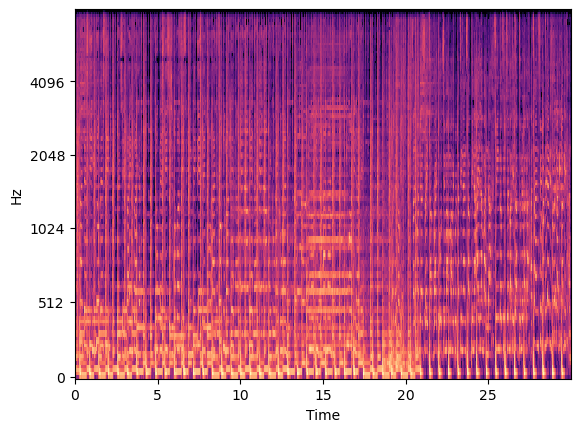

In [46]:
visualize_waveform()

In [95]:
crop_image()

In [195]:
reduce_image_size()

/var/folders/kq/fhf47yp54w1byy_p5j5n4c340000gn/T/ipykernel_2414/2723063280.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((320, 240),Image.ANTIALIAS)


In [196]:
test_pred['Path'] = './Docs/IMG/Resized/' + test_pred['Track_ID'] + '_resized.png'

In [197]:
list_ids_img = []
for files in os.listdir('./Docs/IMG'):
  list_ids_img.append(files.split('.')[0])

In [198]:
np_img = []
for i in os.listdir('./Docs/IMG/Resized/'):
  try:
    image = Image.open(f'./Docs/IMG/Resized/{i}')
    np_img.append(np.asarray(image,dtype=np.float32))
  except:
    continue
    print(i)

In [199]:
np_img[0].shape

(240, 320, 3)

In [200]:
test_pred_real = test_pred.loc[test_pred.Track_ID.isin(list_ids_img)]

In [201]:
test_pred_real.drop(columns=['Track_ID', 'Track_Title', 'Track_Artist', 'Track_Popularity','Track_URL', 'Path', 'NPZ_Path'], inplace= True)

/var/folders/kq/fhf47yp54w1byy_p5j5n4c340000gn/T/ipykernel_2414/4000404896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pred_real.drop(columns=['Track_ID', 'Track_Title', 'Track_Artist', 'Track_Popularity','Track_URL', 'Path', 'NPZ_Path'], inplace= True)


In [202]:
test_pred_real

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acoutsicness,Instrumentalness,Liveness,Valence,Tempo
21,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087
48,0.501,0.211,5,-11.719,0,0.0386,0.93700,0.000574,0.1020,0.131,77.784
50,0.646,0.471,10,-9.247,1,0.1570,0.12200,0.000000,0.1250,0.455,170.084
59,0.757,0.446,11,-8.355,0,0.3850,0.66700,0.000051,0.0626,0.509,193.853
76,0.802,0.864,6,-5.442,0,0.0386,0.10600,0.001070,0.0408,0.828,115.997
85,0.927,0.377,11,-9.180,1,0.0548,0.00978,0.000026,0.0564,0.561,105.000
112,0.569,0.657,1,-7.571,0,0.1180,0.82600,0.291000,0.1060,0.411,124.869
129,0.862,0.753,5,-5.356,1,0.0625,0.13100,0.000002,0.0770,0.827,105.039
148,0.679,0.610,7,-10.936,0,0.0305,0.58500,0.000095,0.1560,0.554,123.978
165,0.792,0.773,2,-6.289,0,0.2640,0.34400,0.260000,0.1670,0.762,98.963


In [203]:
np_stats = test_pred_real
np_stats = np.array(np_stats)

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
np_stats = scaler.fit_transform(np_stats)

In [205]:
np_stats = tf.constant(np_stats)
np_img = tf.constant(np_img)

In [206]:
np_stats.shape, np_img.shape

(TensorShape([11, 11]), TensorShape([11, 240, 320, 3]))

In [207]:
np_stats = tf.expand_dims(np_stats, 0)
np_img = tf.expand_dims(np_img, 0)

In [208]:
np_stats.shape, np_img.shape

(TensorShape([1, 11, 11]), TensorShape([1, 11, 240, 320, 3]))

# MAKES PREDICTIONS AND COMPARE THEM

In [210]:
preds = []
for i in range(len(np_img)):
  preds.append(model.predict((np_img[i],np_stats[i])))

preds

1/1 [==============================] - 5s 5s/step


[array([[26.49286 ],
        [23.128542],
        [31.13504 ],
        [34.516758],
        [51.601246],
        [35.073223],
        [35.19347 ],
        [48.495316],
        [35.02031 ],
        [36.480705],
        [42.00406 ]], dtype=float32)]

In [211]:
my_Music['Preds'] = ''

In [212]:
preds_df = my_Music.iloc[:11,]

In [213]:
list_preds = []
for i in preds:
  for j in i:
    for k in j:
      list_preds.append(k)

In [215]:
preds_df['Preds'] = list_preds

/var/folders/kq/fhf47yp54w1byy_p5j5n4c340000gn/T/ipykernel_2414/4241955109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df['Preds'] = list_preds


In [216]:
preds_df['Preds_diff'] = abs(preds_df['Preds'] - preds_df['Track_Popularity'])

/var/folders/kq/fhf47yp54w1byy_p5j5n4c340000gn/T/ipykernel_2414/3535314390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df['Preds_diff'] = abs(preds_df['Preds'] - preds_df['Track_Popularity'])


In [217]:
preds_df

,Track_ID,Track_Title,Track_Artist,Track_Popularity,Track_URL,Preds,Preds_diff
2,69FKjWduD5QS7Au7LV51y4,Island (Nôze Swimming Circles Remix) [feat. Caro],Padberg,12,https://p.scdn.co/mp3-preview/eeee7fa521bfdb81...,26.492861,14.492861
3,1dWxSS2a93X4XVfs1mSYkB,Bluebird,Alexis Ffrench,61,https://p.scdn.co/mp3-preview/5685b0b13663f0d6...,23.128542,37.871458
5,1mPqkPH49x4jSGa4pIvqvr,Turning Blind,Bondi,33,https://p.scdn.co/mp3-preview/b0ad49b0b393a857...,31.135040,1.864960
6,7iUQROXqrJGdnzGsmDJy0A,Without,MAZ'N,42,https://p.scdn.co/mp3-preview/9541411047da08ca...,34.516758,7.483242
8,5IgjP7X4th6nMNDh4akUHb,Under The Influence,Chris Brown,94,https://p.scdn.co/mp3-preview/119b5ce31d6768a9...,51.601246,42.398754
9,4iAADGCKIR9GkLGvAHfZUS,Beat Goes On (Rhythm to the Brain),Campbell,72,https://p.scdn.co/mp3-preview/c21ae243033a42d6...,35.073223,36.926777
10,6xGruZOHLs39ZbVccQTuPZ,Glimpse of Us,Joji,89,https://p.scdn.co/mp3-preview/ff2dbd24fd1b0a75...,35.193470,53.806530
14,00qcCTakk6Q9LVR7ZL1Hle,Poudre de love,LUSKA,2,https://p.scdn.co/mp3-preview/d3ebfe4ed4998fbf...,48.495316,46.495316
16,3RNyGLgSvmVRZ7xKUp8Wgd,In the Summertime,Mungo Jerry,69,https://p.scdn.co/mp3-preview/ea8e401415e42fbb...,35.020309,33.979691
17,5kWK7atS38wbMeNlytoqA4,Galop infernal,Jacques Offenbach,38,https://p.scdn.co/mp3-preview/dbb097dd9d14c5da...,36.480705,1.519295
